### Carga de paquetes

In [1]:
#pip install pyheif
#pip install Pillow

import numpy as np


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt #Para graficar
from skimage.io import imshow #Para graficar las imagenes
import tensorflow as tf


import os
import glob
#from PIL import Image
import cv2

#import pyheif

import matplotlib.pyplot as plt


Seteamos los directorios done se encuentran las fotos recortadas: ORganizadas en una carpeta por persona.

In [2]:
#root_path = "C:/MaestriaDocs/DMA - Proyecto/caras_grupo4/"
root_path = "../"
#directorio_origen = root_path + "Nuestras_Caras"
#destino = root_path + "Caras_cortadas"
dir_caras_cortadas = root_path + "Caras_cortadas"

## Preparamos la matriz inicial

Obtenemos las imágenes a procesar ya recortadas desde la carpeta /Caras_cortadas
Conversión de las imágenes a un Numpy Array. Conversión de los datos a una matriz que contiene datos sin procesar. La función array by numpy toma una lista como entrada.
Redimensionamos las imagenes a 30 X 30
La imagen se agrega a un array con los 900 pixel
Cada imagen vectorizada se agraga a una matriz formando una matriz de dimensiones cantidad de imagen X 900 pixel

In [3]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

In [4]:
from PCA_funciones import matriz_fotos_desde_carpeta

image_matrix, image_person = matriz_fotos_desde_carpeta(dir_caras_cortadas)

Carpeta: Abel
Carpeta: Carlos
Carpeta: Federico G
Carpeta: Federico R
Carpeta: Florencia
Carpeta: Franco A
Carpeta: Franco S
Carpeta: Gerard
Carpeta: Gustavo
Carpeta: Joaquin
Carpeta: Juan
Carpeta: Lautaro
Carpeta: Lisandro
Carpeta: Marco
Carpeta: Matias
Carpeta: Natalia
Carpeta: Noelia
Carpeta: Paola
Carpeta: Victorio


In [5]:
image_matrix.shape

(1206, 900)

## PCA 

In [11]:
"""scaler = StandardScaler()
imagenes_estandarizadas = scaler.fit_transform(image_matrix)
pca             = PCA()
pca.fit(imagenes_estandarizadas)
# Proyectar las imágenes al espacio de los componentes principales
#projected_images = pca.transform(imagenes_estandarizadas)"""


# Aplicar PCA y guardA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

scaler = StandardScaler()
imagenes_estandarizadas = scaler.fit_transform(image_matrix)

# Guardar el escalador
ruta_scaler = root_path + 'PCA/scaler.pkl'

with open(ruta_scaler, 'wb') as f:
    pickle.dump(scaler, f)  #guardamos esto porque no vamos a tener la misma media y desvio para escalar los datos de las nuevas fotos..

pca             = PCA() # pca, no filtramos por cantidad de componentes, luego lo hacemos
pca.fit(imagenes_estandarizadas)
# Proyectar las imágenes al espacio de los componentes principales
projected_images = pca.transform(imagenes_estandarizadas)

# Guardar los componentes PCA
ruta_pca = root_path + "PCA/Componentes_pca.npy"
np.save(ruta_pca, pca.components_) ### guardamos las 900 componentes  para en el proceso posterior poder hacer una funcion que varie los componentes a utilizar para la reduccion


### PCA-Libreria - Scree plot

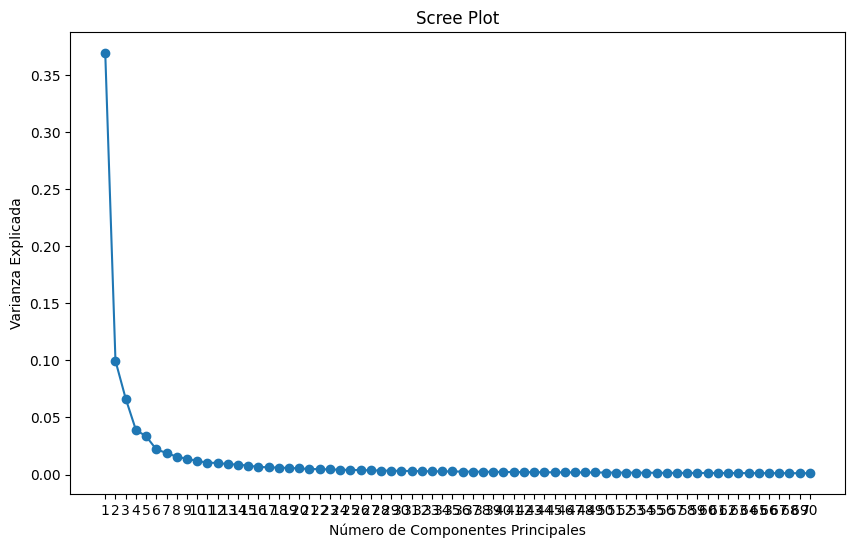

In [12]:
# Calcular las varianzas explicadas
varianza_explicada = pca.explained_variance_ratio_[:70] #el grafico hasta 900 no se podia observar bien lo acotamos
componentes_principales = np.arange(1, len(varianza_explicada) + 1)

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.plot(componentes_principales, varianza_explicada, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes_principales)
#plt.grid(True)
plt.show()

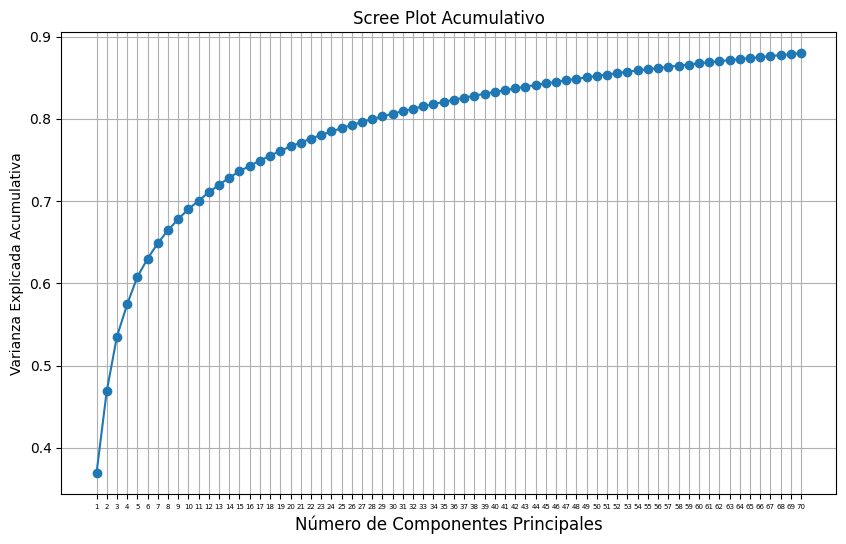

In [13]:
# Calcular la varianza explicada acumulativa
varianza_explicada = np.cumsum(pca.explained_variance_ratio_[:70])
num_componentes = len(varianza_explicada)

# Crear el scree plot acumulativo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_componentes + 1), varianza_explicada, marker='o', linestyle='-')
plt.title('Scree Plot Acumulativo')
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(np.arange(1, num_componentes + 1), fontsize=5)  # Ajuste del tamaño de la fuente del eje x
plt.grid(True)
plt.show()

###  PCA-Libreria - Comparamos componentes

 Comparación de proyeccion de componentes: 1 - 2


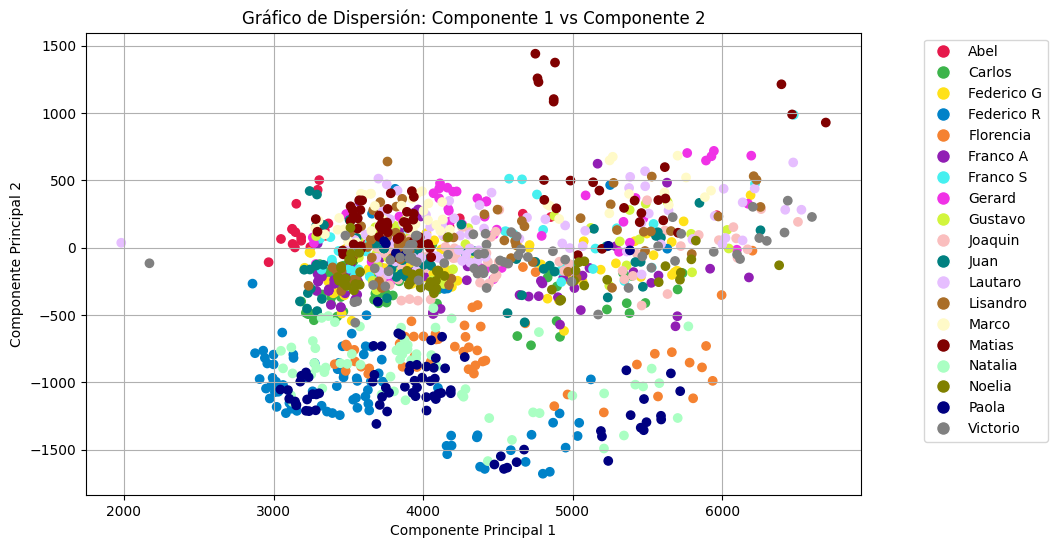

 Comparación de proyeccion de componentes: 3 - 4


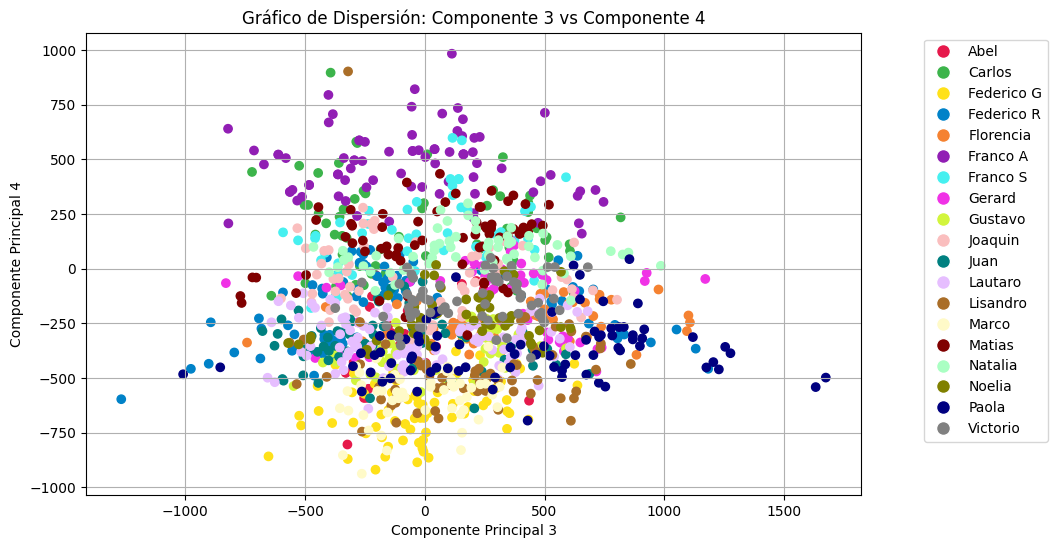

 Comparación de proyeccion de componentes: 5 - 6


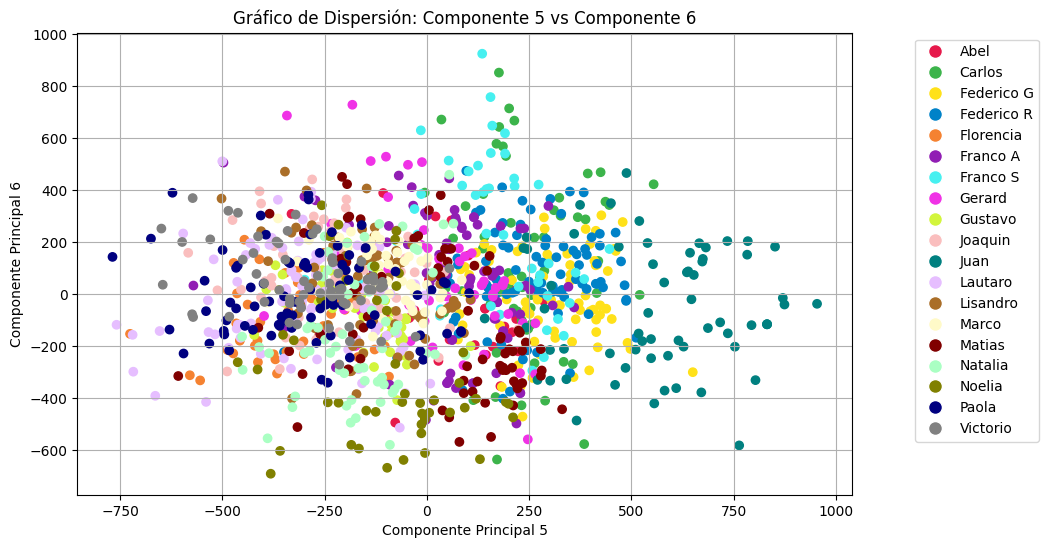

 Comparación de proyeccion de componentes: 7 - 8


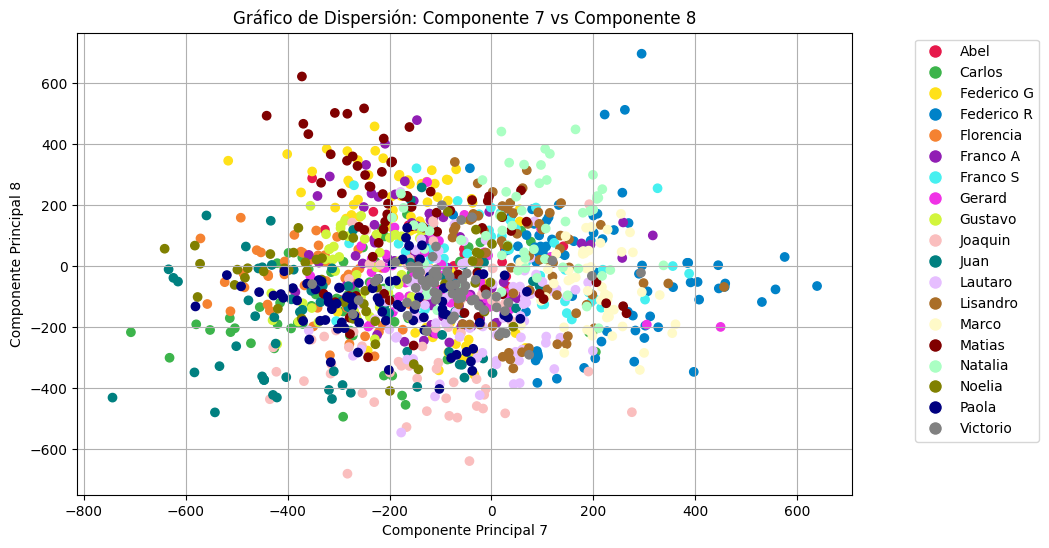

In [14]:
imagenes_transformadas = pca.transform(image_matrix)
personas = np.unique(image_person)


# Creamos una paleta de colores personalizada con 18 colores

"""paleta_colores = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#1f77b4', '#ff7f0e',
    '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]"""

paleta_colores = [
    '#e6194b',  # Rojo brillante
    '#3cb44b',  # Verde
    '#ffe119',  # Amarillo
    '#0082c8',  # Azul
    '#f58231',  # Naranja
    '#911eb4',  # Púrpura
    '#46f0f0',  # Cian
    '#f032e6',  # Magenta
    '#d2f53c',  # Lima
    '#fabebe',  # Rosa claro
    '#008080',  # Teal
    '#e6beff',  # Lila
    '#aa6e28',  # Marrón
    '#fffac8',  # Amarillo pálido
    '#800000',  # Marrón oscuro
    '#aaffc3',  # Verde pálido
    '#808000',  # Verde oliva
    
    '#000080',  # Azul marino
    '#808080' ,  # Gris
    '#ffd8b1'  # Durazno
]
# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]
# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]



for i in range(0, 8, 2):
    
    # Iteramos de 2 para ir observando relacion entre los componentes
    # Extraer los primeros dos componentes principales
    componente1 = imagenes_transformadas[:, i] #relacion de la componente1 en cada
    componente2 = imagenes_transformadas[:, i+1] #relacion de la componente2 en cada

    print(f" Comparación de proyeccion de componentes: {i+1} - {i+2}")
   
    # Crear leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]

    # Crear el scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(componente1, componente2, c=colores_personas)
    plt.title(f'Gráfico de Dispersión: Componente {i+1} vs Componente {i+2}')
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel(f'Componente Principal {i+2}')
    plt.grid(True)
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

###  PCA-Libreria - Observamos imagenes de las primeras componentes

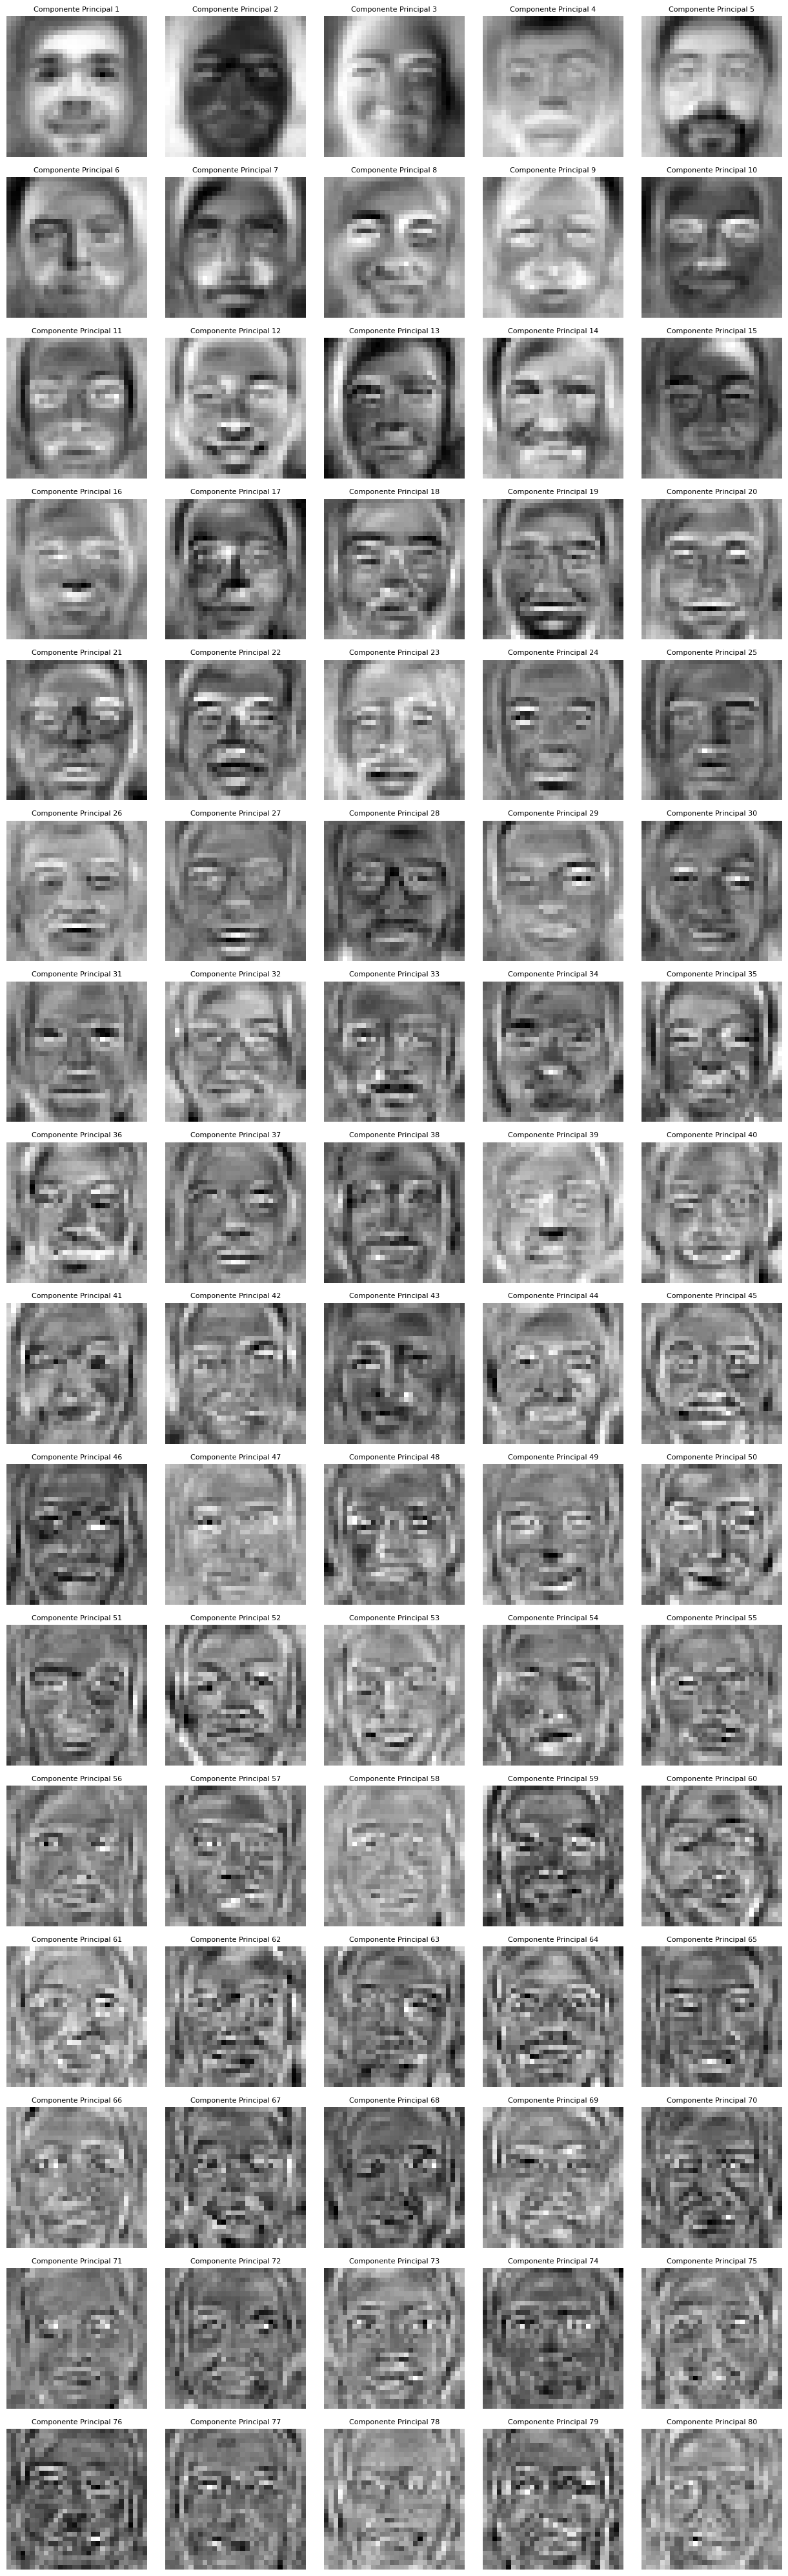

In [15]:

# observamos, imagenes armadas con los primeros 4 componentes principales
componentes=80
columnas=5
filas = componentes//columnas
fig, axs = plt.subplots(filas, columnas, figsize=(2.5*columnas, 2.5*filas))

for i in range(componentes):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i# Definir los números

    # Obtener la parte entera de la división
    parte_entera = (i // columnas) 

    # Obtener el resto de la división
    resto = i % columnas

    # Imprimir los resultados
    componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    axs[parte_entera, resto].imshow(imagen_componente_principal, cmap='gray')
    axs[parte_entera, resto].set_xticks([])
    axs[parte_entera, resto].set_yticks([])
    axs[parte_entera, resto].set_title(f'Componente Principal {indice_componente_principal + 1}', fontsize=8)
    axs[parte_entera, resto].axis('off')
  
plt.tight_layout()
plt.show()

## PCA Paso a Paso

In [16]:
import numpy as np

new_faces_array = image_matrix

#### Pca-Paso A Paso - Estandarizamos

In [17]:
# Paso 1: Calcular la media de cada característica
mean = np.mean(new_faces_array, axis=0)

# Paso 2: Calcular la desviación estándar de cada característica
std = np.std(new_faces_array, axis=0)

# Paso 3: Estandarizar los datos (restar la media y dividir por la desviación estándar)
new_faces_array_estandarizado = (new_faces_array - mean) / std #equivaente a imagenes_estandarizadas

In [18]:
new_faces_array_estandarizado

array([[ 3.26706930e-01,  3.66325421e-01,  6.28161028e-01, ...,
        -9.45315883e-01, -9.14573019e-01, -1.04476757e+00],
       [ 1.82242325e+00,  1.88304734e+00,  1.94767622e+00, ...,
         1.26919420e-03, -6.51733804e-02, -4.82459853e-02],
       [ 3.06217666e-01,  2.89529374e-01,  6.28161028e-01, ...,
        -6.02934046e-01, -6.57777779e-01, -6.99035592e-01],
       ...,
       [-1.65035420e-01, -1.76548126e-02, -3.52559720e-01, ...,
        -2.20271994e-01, -2.23201220e-01, -2.31280562e-01],
       [ 1.04383119e+00, -7.08819233e-01,  4.06600642e-03, ...,
         1.14925535e+00,  1.31757022e+00,  1.27367040e+00],
       [-1.44546155e-01, -2.48042953e-01, -8.51835737e-01, ...,
         2.42950490e-01,  2.70635779e-01,  1.34788592e-01]])

In [45]:
imagenes_estandarizadas #observamos que es lo mismoque se obtiene opr el paquer

array([[ 3.26706930e-01,  3.66325421e-01,  6.28161028e-01, ...,
        -9.45315883e-01, -9.14573019e-01, -1.04476757e+00],
       [ 1.82242325e+00,  1.88304734e+00,  1.94767622e+00, ...,
         1.26919420e-03, -6.51733804e-02, -4.82459853e-02],
       [ 3.06217666e-01,  2.89529374e-01,  6.28161028e-01, ...,
        -6.02934046e-01, -6.57777779e-01, -6.99035592e-01],
       ...,
       [-1.65035420e-01, -1.76548126e-02, -3.52559720e-01, ...,
        -2.20271994e-01, -2.23201220e-01, -2.31280562e-01],
       [ 1.04383119e+00, -7.08819233e-01,  4.06600642e-03, ...,
         1.14925535e+00,  1.31757022e+00,  1.27367040e+00],
       [-1.44546155e-01, -2.48042953e-01, -8.51835737e-01, ...,
         2.42950490e-01,  2.70635779e-01,  1.34788592e-01]])

### Pca-Paso A Paso - Calculamos las matrices

In [20]:
# Paso 2: Cálculo matriz de Covarianza
cov_matrix = np.cov(new_faces_array_estandarizado, rowvar=False)

In [21]:
# Paso 3: Cálculo matriz eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [22]:
# Paso 4: Ordenar los eigenvectors por disminución eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

In [23]:
# Paso 5: Elejir la cantidad de componentes principales que se desean conservar
explained_variances = eigenvalues / np.sum(eigenvalues) * 100
total_variance = np.cumsum(explained_variances) 
# calcula la suma acumulativa de los elementos en el arreglo explained_variances utilizando la función cumsum() de NumPy.

# explained_variances es un arreglo unidimensional que contiene las varianzas explicadas por cada componente principal en orden descendente 
# (es decir, el primer elemento es la varianza explicada por el primer componente principal, el segundo elemento es la suma de las varianzas explicadas 
# por el primer y segundo componentes principales, y así sucesivamente).
# El resultado de np.cumsum(explained_variances) será otro total_variance  de la misma longitud que explained_variances, 
# donde cada elemento representa la suma acumulativa de las varianzas explicadas hasta el índice correspondiente.
num_components = np.argmax(total_variance >= 90) + 1
# np.argmax(total_variance >= 95) devuelve el índice del primer elemento en el arreglo total_variance que es mayor o igual a 95. 
# Luego se le suma 1 para obtener el número de componentes principales necesario para explicar al menos el 95% de la varianza total.

print(f'Cantidad de componentes a utilizar: {num_components}')
print(explained_variances)


Cantidad de componentes a utilizar: 91
[3.69055523e+01 9.96170692e+00 6.65565884e+00 3.91112623e+00
 3.35032628e+00 2.20694485e+00 1.88650366e+00 1.56174324e+00
 1.37863204e+00 1.19241939e+00 1.04094623e+00 1.01493420e+00
 9.10687436e-01 8.72344993e-01 7.71289180e-01 6.70139644e-01
 6.29702084e-01 6.06047803e-01 5.76901110e-01 5.36267116e-01
 4.84269120e-01 4.72106961e-01 4.47757467e-01 4.23441036e-01
 4.01392401e-01 3.94556144e-01 3.61539631e-01 3.51440318e-01
 3.30695378e-01 3.21779802e-01 3.11521405e-01 2.93829657e-01
 2.82820644e-01 2.76394692e-01 2.70775290e-01 2.58592205e-01
 2.50272279e-01 2.44072448e-01 2.33907680e-01 2.27674355e-01
 2.19618960e-01 2.12215009e-01 2.04907625e-01 2.01727528e-01
 1.92539643e-01 1.90724144e-01 1.86753465e-01 1.82448869e-01
 1.79248056e-01 1.75993036e-01 1.70022641e-01 1.68997336e-01
 1.61500912e-01 1.58732320e-01 1.54481975e-01 1.46800689e-01
 1.43955520e-01 1.41981689e-01 1.39843477e-01 1.35535631e-01
 1.34381436e-01 1.31208932e-01 1.28321743e-01 

In [24]:
# Paso 6: Proyectar los datos centrados sobre la nueva base formada por los eigenvectors
new_basis = eigenvectors[:, :num_components]
new_faces_array_transformed = np.dot(new_faces_array_estandarizado, eigenvectors) #multiplicacion matricial

In [25]:
eigenvectors #equivalente a PCA component calculado previamente con la libreria

array([[-0.03415466, -0.02207786,  0.03237044, ...,  0.02022939,
        -0.0366756 ,  0.03936096],
       [-0.03224207, -0.03295448,  0.02870989, ..., -0.04307158,
        -0.01267061,  0.02477302],
       [-0.02920035, -0.04100251,  0.02417885, ..., -0.00361181,
        -0.01749353,  0.01805867],
       ...,
       [-0.02454191, -0.05556561,  0.03205391, ...,  0.05194666,
         0.0037666 , -0.01884611],
       [-0.02585287, -0.05271759,  0.03225917, ..., -0.00715727,
         0.01104192, -0.00522733],
       [-0.02635184, -0.05038958,  0.03349796, ...,  0.00876591,
        -0.01741544, -0.0114129 ]])

In [26]:
eigenvectors.T

array([[-0.03415466, -0.03224207, -0.02920035, ..., -0.02454191,
        -0.02585287, -0.02635184],
       [-0.02207786, -0.03295448, -0.04100251, ..., -0.05556561,
        -0.05271759, -0.05038958],
       [ 0.03237044,  0.02870989,  0.02417885, ...,  0.03205391,
         0.03225917,  0.03349796],
       ...,
       [ 0.02022939, -0.04307158, -0.00361181, ...,  0.05194666,
        -0.00715727,  0.00876591],
       [-0.0366756 , -0.01267061, -0.01749353, ...,  0.0037666 ,
         0.01104192, -0.01741544],
       [ 0.03936096,  0.02477302,  0.01805867, ..., -0.01884611,
        -0.00522733, -0.0114129 ]])

In [27]:
pca.components_

array([[ 0.03415466,  0.03224207,  0.02920035, ...,  0.02454191,
         0.02585287,  0.02635184],
       [ 0.02207786,  0.03295448,  0.04100251, ...,  0.05556561,
         0.05271759,  0.05038958],
       [-0.03237044, -0.02870989, -0.02417885, ..., -0.03205391,
        -0.03225917, -0.03349796],
       ...,
       [ 0.02022939, -0.04307158, -0.00361181, ...,  0.05194666,
        -0.00715727,  0.00876591],
       [-0.0366756 , -0.01267061, -0.01749353, ...,  0.0037666 ,
         0.01104192, -0.01741544],
       [ 0.03936096,  0.02477302,  0.01805867, ..., -0.01884611,
        -0.00522733, -0.0114129 ]])

### Pca-Paso A Paso - Scree plot

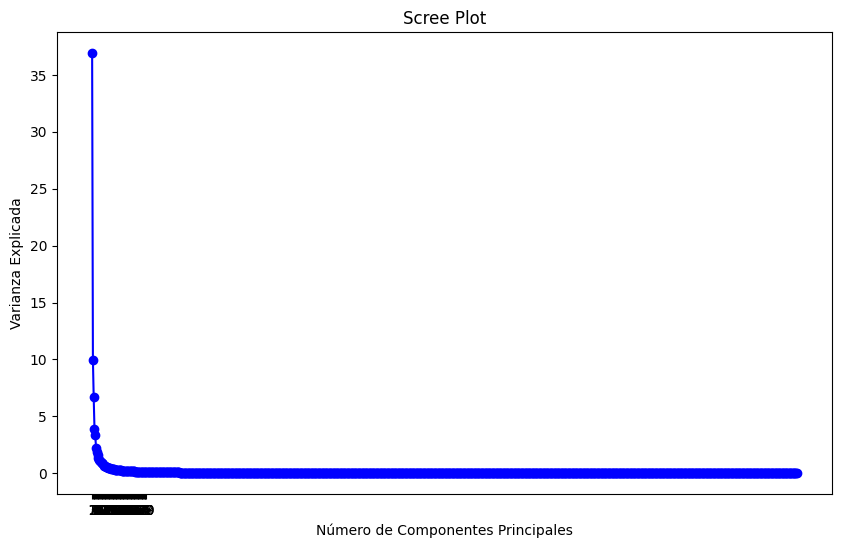

In [28]:
# Calcular las varianzas explicadas

# Crear el scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variances)+1), explained_variances, 'bo-')
#plt.plot(componentes_principales, explained_variances, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes_principales)
#plt.grid(True)
plt.show()

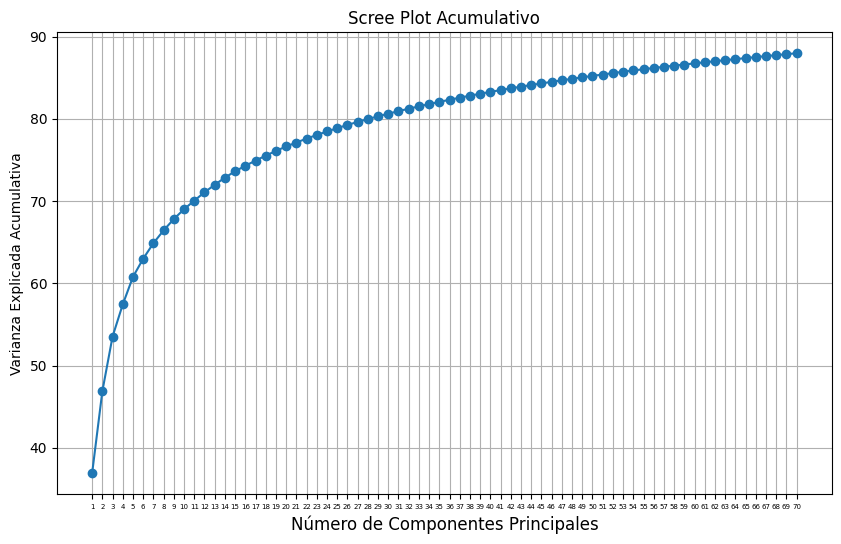

In [29]:
# Calcular la varianza explicada acumulativa
explained_variances2 = np.cumsum(explained_variances[:70])
num_componentes = len(explained_variances2)

# Crear el scree plot acumulativo
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_componentes + 1), explained_variances2, marker='o', linestyle='-')
plt.title('Scree Plot Acumulativo')
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(np.arange(1, num_componentes + 1), fontsize=5)  # Ajuste del tamaño de la fuente del eje x
plt.grid(True)
plt.show()

### Pca-Paso A Paso - Comparamos componentes

 Comparación de proyeccion de componentes: 1 - 2


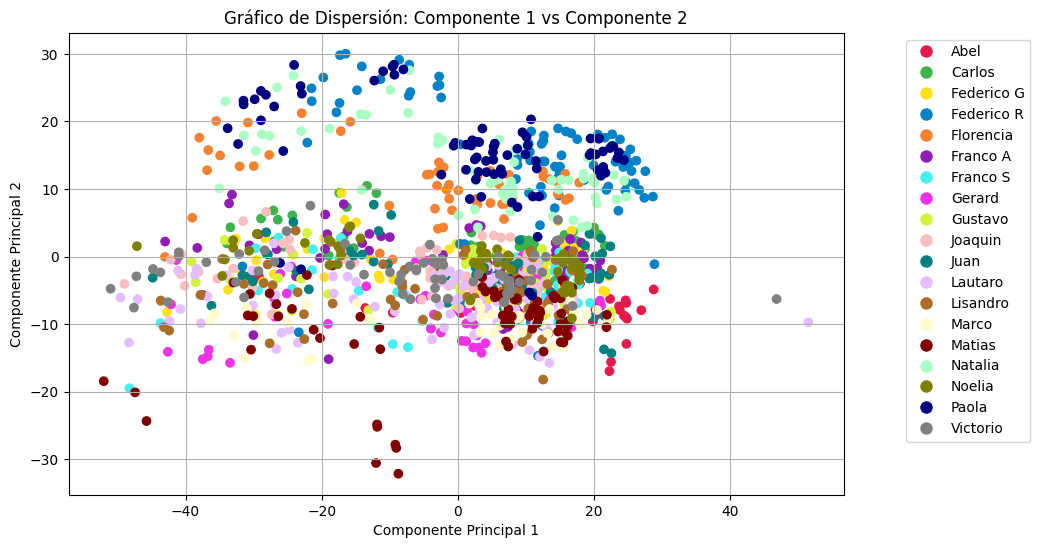

 Comparación de proyeccion de componentes: 3 - 4


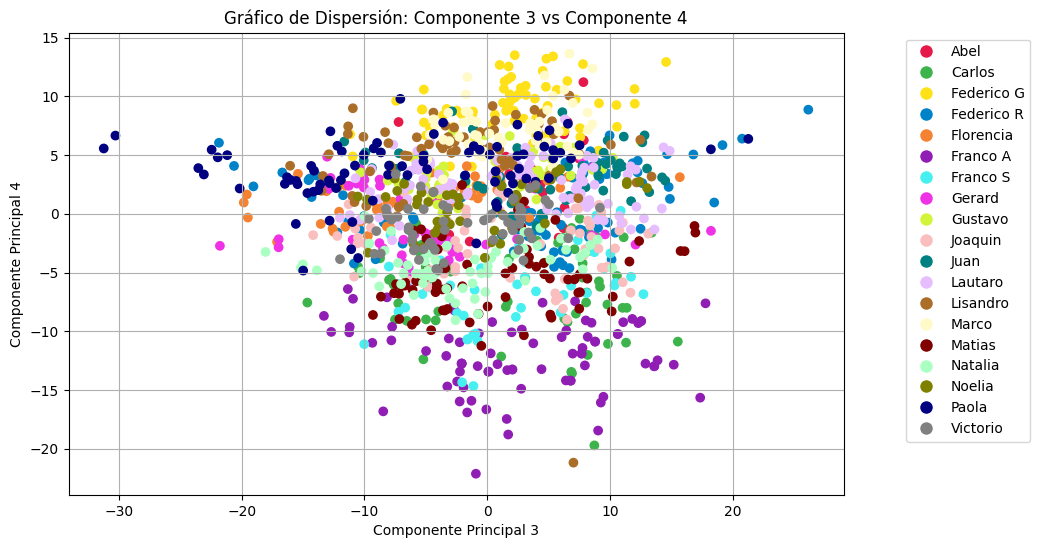

 Comparación de proyeccion de componentes: 5 - 6


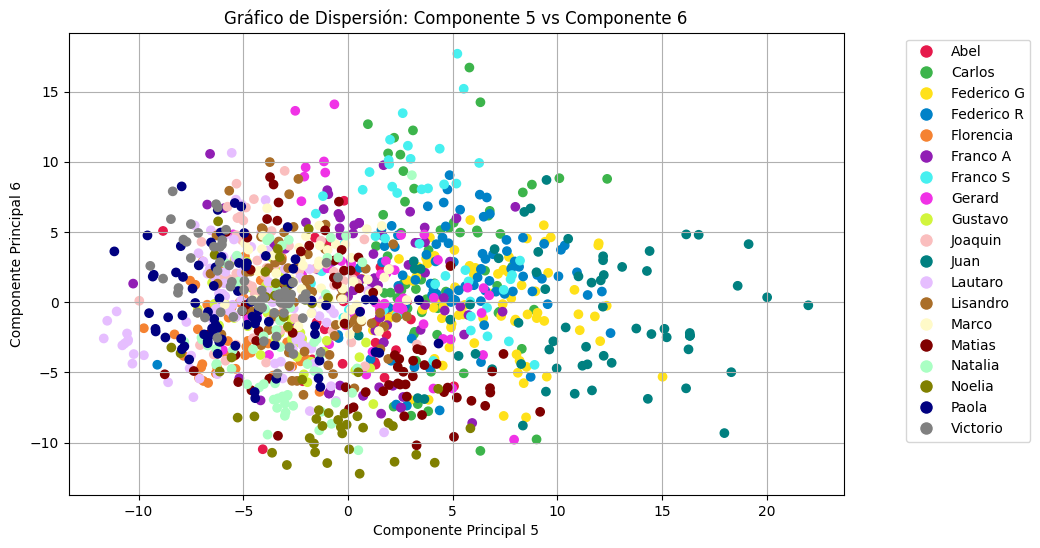

 Comparación de proyeccion de componentes: 7 - 8


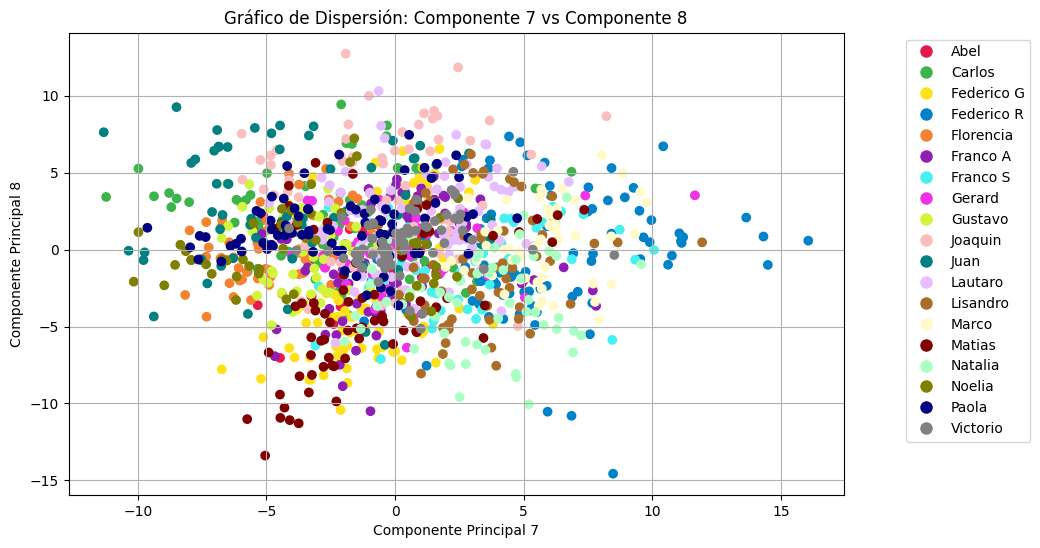

In [30]:
#imagenes_transformadas = pca.transform(image_matrix)
personas = np.unique(image_person)

new_faces_array_transformed
# Creamos una paleta de colores personalizada con 18 colores

"""paleta_colores = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#1f77b4', '#ff7f0e',
    '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]"""

paleta_colores = [
    '#e6194b',  # Rojo brillante
    '#3cb44b',  # Verde
    '#ffe119',  # Amarillo
    '#0082c8',  # Azul
    '#f58231',  # Naranja
    '#911eb4',  # Púrpura
    '#46f0f0',  # Cian
    '#f032e6',  # Magenta
    '#d2f53c',  # Lima
    '#fabebe',  # Rosa claro
    '#008080',  # Teal
    '#e6beff',  # Lila
    '#aa6e28',  # Marrón
    '#fffac8',  # Amarillo pálido
    '#800000',  # Marrón oscuro
    '#aaffc3',  # Verde pálido
    '#808000',  # Verde oliva
    
    '#000080',  # Azul marino
    '#808080' ,  # Gris
    '#ffd8b1'  # Durazno
]
# Creamos un diccionario que asigna a cada persona un color específico
colores = {}
for i, persona in enumerate(personas):
    colores[persona] = paleta_colores[i % len(paleta_colores)]
# Convertimos los nombres de las personas en colores según el diccionario
colores_personas = [colores[persona] for persona in image_person]



for i in range(0, 8, 2):
    
    # Iteramos de 2 para ir observando relacion entre los componentes
    # Extraer los primeros dos componentes principales
    componente1 = new_faces_array_transformed[:, i] #relacion de la componente1 en cada
    componente2 = new_faces_array_transformed[:, i+1] #relacion de la componente2 en cada

    print(f" Comparación de proyeccion de componentes: {i+1} - {i+2}")
   
    # Crear leyenda personalizada
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores[persona], markersize=10, label=persona) for persona in personas]

    # Crear el scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(componente1, componente2, c=colores_personas)
    plt.title(f'Gráfico de Dispersión: Componente {i+1} vs Componente {i+2}')
    plt.xlabel(f'Componente Principal {i+1}')
    plt.ylabel(f'Componente Principal {i+2}')
    plt.grid(True)
    plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

### Observamos imagenes de las primeras componentes

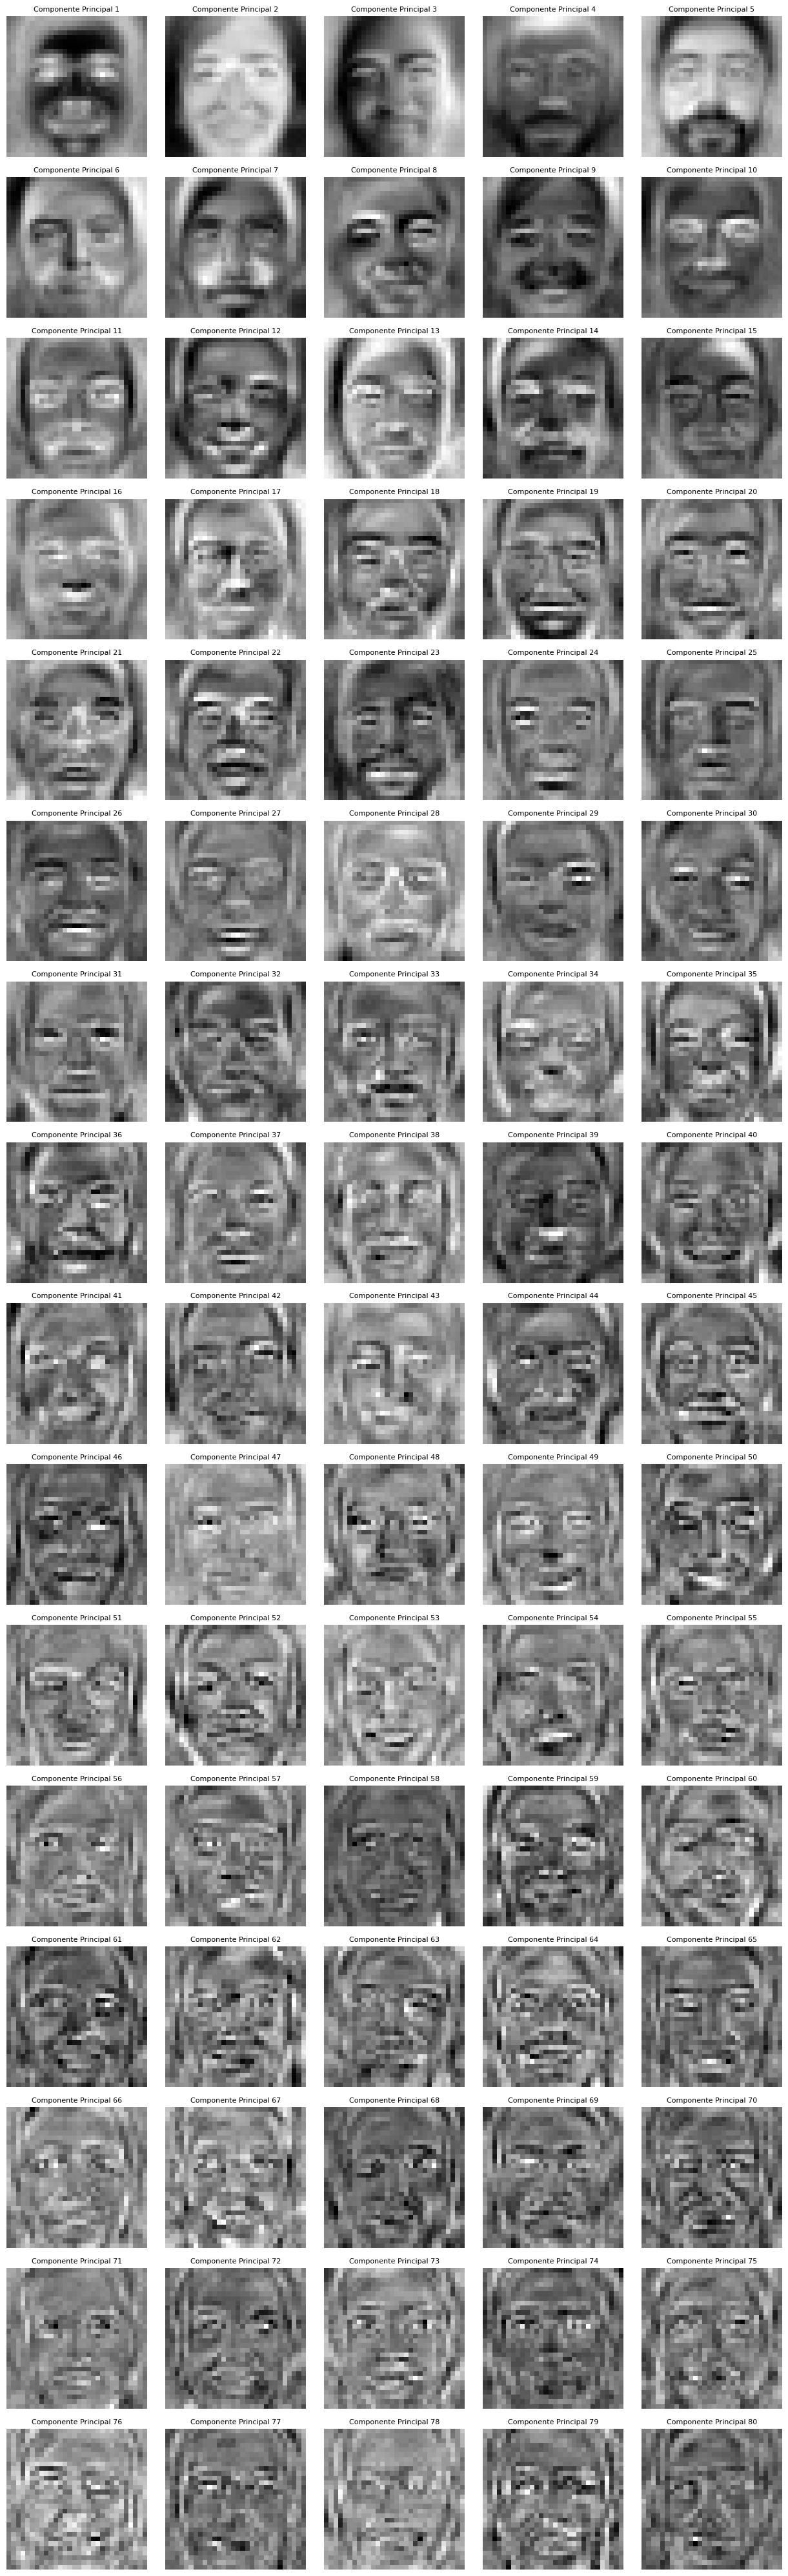

In [58]:
# observamos, imagenes armadas con los primeros 4 componentes principales
componentes=80
columnas=5
filas = componentes//columnas
fig, axs = plt.subplots(filas, columnas, figsize=(2.5*columnas, 2.5*filas))

for i in range(componentes):
    # Extrae la componente principal correspondiente
    #componente_principal = eigenvectors[:, indice_componente_principal]
    indice_componente_principal = i# Definir los números

    # Obtener la parte entera de la división
    parte_entera = (i // columnas) 

    # Obtener el resto de la división
    resto = i % columnas

    # Imprimir los resultados
    #componente_principal_normalizada =  pca.components_.copy()[indice_componente_principal]
    componente_principal_normalizada = eigenvectors[:, indice_componente_principal]
    # Convierte la componente principal normalizada en una matriz de la forma de una imagen (por ejemplo, 30x30 píxeles)
    imagen_componente_principal = componente_principal_normalizada.reshape((30, 30))

    axs[parte_entera, resto].imshow(imagen_componente_principal, cmap='gray')
    axs[parte_entera, resto].set_xticks([])
    axs[parte_entera, resto].set_yticks([])
    axs[parte_entera, resto].set_title(f'Componente Principal {indice_componente_principal + 1}', fontsize=8)
    axs[parte_entera, resto].axis('off')
  
plt.tight_layout()
plt.show()

## Aplicamos Backpropagation

Transformamos las imagenes, con la cantidad de copoenentes 

In [ ]:

from sklearn.decomposition import PCA
import pickle

# Cargar los componentes PCA guardados
ruta_pca = root_path + "PCA/Componentes_pca.npy" #lo tenemos en memoria pero lo leemos nuevamente por si separamos el codigo
pca_components = np.load(ruta_pca)

# Cargar el escalador
ruta_scaler = root_path + 'PCA/scaler.pkl' #
with open(ruta_scaler, 'rb') as f:
    scaler = pickle.load(f)

# Función para transformar una imagen con un rango específico de componentes PCA
def transformar_imagen_pca(imagen, scaler, pca_components, num_componentes=50, inicio_componente=0):
    # Estandarizar la imagen
    imagen_estandarizada = scaler.transform(imagen)
    
    # Seleccionar el rango de componentes
    componentes_seleccionados = pca_components[inicio_componente:inicio_componente + num_componentes]
    
    # Realizar la proyección manualmente
    imagen_pca = np.dot(imagen_estandarizada, componentes_seleccionados.T)
    return imagen_pca


# Especificar la cantidad de componentes a utilizar y el componente de inicio
num_componentes = 60
inicio_componente = 2 #inicia a partir de la 3ta componente

# Transformar la nueva imagen utilizando los componentes especificados
imagenes_pca_reducidas = transformar_imagen_pca( image_matrix, scaler, pca_components, num_componentes, inicio_componente)

print(imagenes_pca_reducidas)


[[-7.95442417e+00  2.84607611e+00 -1.48329068e+00 ... -7.79210495e-01
  -2.07346722e+00  1.60422049e+00]
 [ 1.84609995e+00 -5.16294815e+00 -1.46929189e+00 ... -2.13485038e-01
  -2.06789460e+00 -7.24677401e-01]
 [-3.71127778e+00  9.75119092e-01 -7.26671143e+00 ...  1.00206343e+00
  -2.79053952e-01 -3.88449624e-01]
 ...
 [-1.38279429e+01  5.15759183e+00 -2.22275643e+00 ...  4.79877167e-01
  -2.29335443e-01  1.24109795e+00]
 [ 2.90214741e+00  2.43894922e+00 -7.22408467e+00 ... -2.97984685e-01
   5.11082395e-01 -1.26008694e-02]
 [ 4.72434372e+00  2.27180529e+00 -5.97963119e+00 ... -1.10437859e+00
   4.36359806e-01  6.48711356e-01]]


In [ ]:
imagenes_pca_reducidas.shape

(272, 60)

In [ ]:
personas = np.unique(image_person)

In [ ]:
image_person #(vector que tiene el nombre de la persona de cada foto)

['Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Abel',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Carlos',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico G',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Federico R',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Florencia',
 'Franco A

In [ ]:
personas

array(['Abel', 'Carlos', 'Federico G', 'Federico R', 'Florencia',
       'Franco A', 'Franco S', 'Gerard', 'Gustavo', 'Joaquin', 'Juan',
       'Lautaro', 'Lisandro', 'Marco', 'Matias', 'Natalia', 'Noelia',
       'Paola', 'Victorio'], dtype='<U10')

In [ ]:
personas.shape

(19,)

In [ ]:
cantidad_personas = len(personas)
print(cantidad_personas) 

19


In [ ]:
cantidad_fotos = len(image_person)
cantidad_fotos

272

In [ ]:
# salida_lista = []  # Array vacío para almacenar las listas de 0 y 1
# cantidad_personas = len(personas) #podiramos hacer un elemento menos pero por ahora lo dejamos en el total
# # Recorrer cada elemento en "image_person"
# for imagen_persona in image_person:
#   lista_persona = [0] * cantidad_personas   # Inicializar lista con 18 ceros
  
#   # Buscar el índice del nombre de la imagen en "personas"
#  # Encontrar el índice de la persona
#   indice_persona =  np.where(personas == imagen_persona)[0]

#   # Si se encuentra la persona, actualizar la lista
#   if len(indice_persona) > 0:
#     lista_persona[indice_persona[0]] = 1
  
#   # Actualizar el elemento correspondiente en la lista con 1

  
#   # Agregar la lista a Y
#   salida_lista.append(lista_persona)

# salida_lista = np.array(salida_lista) 
# salida_lista


In [ ]:
imagenes_pca_reducidas[0]

array([-7.95442417,  2.84607611, -1.48329068,  5.6348838 , -2.95815514,
       -1.36658468,  1.2092574 ,  7.55054978, -4.12963538, -2.73174025,
        3.03670956, -0.07998956, -2.39451832,  4.35681188, -0.20533735,
        0.82182767, -0.68093784, -0.46020563, -0.03217918,  0.17858157,
        5.10053012, -3.05219766, -2.12950577, -1.00889367, -0.65262314,
       -0.84466441, -1.33445914,  3.15319192, -0.86293594, -1.42081939,
        0.53820596, -0.23140906,  0.56384356,  0.95522461,  2.71872752,
        1.41534154,  1.19292262, -0.99966902, -1.16037561, -1.82709228,
       -1.71523752,  0.97103882, -0.82892561,  0.36428846, -1.86707636,
       -2.30743892, -0.39001857, -1.09930628,  0.09210452, -0.6857839 ,
        4.29879136, -3.10301276, -0.31730123,  1.80982029, -0.14512706,
        2.19915538,  2.09828608, -0.7792105 , -2.07346722,  1.60422049])

In [ ]:
X=imagenes_pca_reducidas
X.shape

(272, 60)

In [ ]:
from sklearn.preprocessing import  LabelBinarizer
# Convertir los valores de la var categórica en números
#salida_lista = LabelBinarizer().fit_transform(image_person) #convierte los nombres (var categorica) en vextores con un 1 en la posicion del nombre
#correspondiente, tiene un renglon por foto y el vector una columna por nombre solo un 1 en el nombre de la persona de la foto


label_binarizer = LabelBinarizer()
salida_lista = label_binarizer.fit_transform(image_person)

In [ ]:
salida_lista

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
salida_lista.shape

(272, 19)

In [ ]:
X = imagenes_pca_reducidas
Y = salida_lista

# Normalización de las entradas
"""mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std
"""
# Convierte la lista a un arreglo NumPy
#salida_lista = nombres_personas
salida = np.array(salida_lista)
Y = salida #salida.reshape(len(X),1)

epoch_limit = 30


In [ ]:

# Semilla para reproducibilidad
np.random.seed(1021) #Establece la semilla para las funciones aleatorias de numpy.  
tf.random.set_seed(1021) #Establece la semilla para las funciones aleatorias de TensorFlow, asegurando que los pesos iniciales de la red neuronal y 4cualquier otra operación aleatoria en TensorFlow sean reproducibles.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1021)

## usando tensor flow

In [ ]:
"""
 este es sii fueran mas de una col etiqueta 
 from sklearn.preprocessing import  OneHotEncoder
encoder = OneHotEncoder()
y_ohe = encoder.fit_transform(y.reshape(-1, 1)).toarray()
"""

'\n este es sii fueran mas de una col etiqueta \n from sklearn.preprocessing import  OneHotEncoder\nencoder = OneHotEncoder()\ny_ohe = encoder.fit_transform(y.reshape(-1, 1)).toarray()\n'

In [ ]:
print(X_train.shape)
X_test.shape

(217, 60)


(55, 60)

In [ ]:
print(Y_train.shape)
Y_test.shape

(217, 19)


(55, 19)

In [ ]:
import tensorflow as tf


# Definir el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_componentes,)),  # Capa de entrada con 60 características - Cantidad de componentes PCA
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y función de activación ReLu (trasmite la infoamción generada por la combinación lineal de los pesos y las entredas, especificamente ReLu permite la propagación hacia atrás efectiva)
                                                    # ReLu genera una salida igual a cero cuando la entrada (z) sea negativa, y una salida igual a la entrada cuando está última es positiva. 
    tf.keras.layers.Dense(cantidad_personas, activation='softmax') # Capa de salida con 18 neuronas y función de activación Softmax (La función calcula la distribución de probabilidades del evento sobre "n" eventos diferentes)
                                                    # Convierte los datos en probabilidades y la suma de las probabilidades da como resultado 1.
])

# Compilar / configurar el proceso de entrenamiento del modelo
model.compile(optimizer='adam', # El optimizador ajusta los parámetros de la red (pesos y sesgos) para minimizar la función pérdida.
                                # Tasa de aprendizaje que se adapta a cada parámetro en forma individual en función de las estimaciones del momento y de la magnitud del gradiente
                                # Busca que el modelo se ajuste a los datos de entrenamiento de manera eficiente y efectiva lo que puede mejorar la predicción.
              loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase. Mide la diferencia de entre las distribucuines de probabilidades predichas por el modelo y las distribuciones reales de las clases.
              metrics=['accuracy']) # Métrica utilizada para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación
                                    # Se una para medir la precisión del modelo (proporción de muestras clasificadas correctamente sobre el total de las muestas)


# Entrenar el modelo
histort=model.fit(X_train, Y_train, epochs=epoch_limit, batch_size=32, validation_data=(X_test, Y_test)) # ANALIZAR GUARDAR LOS RESULTADOS

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0302 - loss: 4.8744 - val_accuracy: 0.0545 - val_loss: 4.0407
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1321 - loss: 3.4576 - val_accuracy: 0.1091 - val_loss: 3.2444
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3269 - loss: 2.4805 - val_accuracy: 0.1455 - val_loss: 2.6148
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5036 - loss: 1.7619 - val_accuracy: 0.3818 - val_loss: 2.1429
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6467 - loss: 1.2412 - val_accuracy: 0.4727 - val_loss: 1.7863
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7880 - loss: 0.8670 - val_accuracy: 0.6000 - val_loss: 1.5165
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9078 - loss: 0.6076 - val_accuracy: 0.6727 - val_loss: 1.3173
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9748 - loss: 0.4362 - val_accuracy: 0.7091 - val_loss: 1.1710
Epoch 9

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

model.evaluate(X_test, Y_test) #BORRAR

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9047 - loss: 0.5456 
Loss: 0.6376761198043823, Accuracy: 0.8727272748947144
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9047 - loss: 0.5456 


[0.6376761198043823, 0.8727272748947144]

In [ ]:
# Obtener las predicciones para el conjunto de prueba
predictions = model.predict(X_test)

# Iterar sobre las predicciones y mostrar el resultado para cada foto
for i in range(len(predictions)):
    # Obtener la predicción para la i-ésima foto
    prediction = predictions[i]
    # Encontrar la etiqueta predicha (la clase con probabilidad más alta)
    predicted_label = np.argmax(prediction) # Identifica la clase que el modelo considera más probable para la imagen
    # Mostrar el resultado
    print(f"Foto {i+1}: Predicción = {predicted_label}, Probabilidades = {prediction}") # nro de foto - la clase con mayor probabilidad - probabilidad de pertenencia a cada clase.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Foto 1: Predicción = 12, Probabilidades = [7.93786676e-05 1.18803946e-04 6.73531601e-03 4.75148932e-04
 2.60375198e-02 2.75062770e-03 1.04040815e-03 3.06465058e-03
 1.75741911e-01 6.90519065e-03 1.59269094e-03 8.16760876e-04
 5.98761857e-01 3.49345477e-03 4.13696188e-03 5.14492020e-03
 7.53844306e-02 1.09716905e-02 7.67482966e-02]
Foto 2: Predicción = 11, Probabilidades = [1.6140711e-03 5.5902577e-03 1.9473381e-02 2.4588827e-02 1.2166137e-02
 1.3728754e-03 1.4806559e-03 3.9643110e-04 2.4868745e-02 2.1579910e-02
 1.0811990e-02 5.1993978e-01 2.1204649e-01 1.3177915e-02 1.4491999e-02
 2.7442051e-03 2.2384657e-02 6.5643229e-03 8.4707454e-02]
Foto 3: Predicción = 18, Probabilidades = [2.9155314e-03 6.6073097e-02 7.4515943e-03 8.4048593e-03 5.2477565e-04
 1.3432686e-02 7.2747204e-03 1.8928883e-03 6.1606979e-03 3.6680344e-02
 5.1758642e-04 4.7555310e-04 6.3603376e-03 1.4262834e-04 1.4310253e-03
 1.9792118e-03 1.4377754e-02 6.5599964e-03 8.1734467e-01]
Fot

In [ ]:
y_predicted = model.predict(X_test)
y_predicho = np.argmax(y_predicted, axis=1)
y_testeo = np.argmax(Y_test, axis=1).reshape(-1, ) 
error_i = (y_predicho - y_testeo != 0)
error_i

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False])

In [ ]:
y_predicho

array([12, 11, 18,  1,  1, 14,  4, 16, 15, 17,  6,  9,  3,  5, 11,  2,  2,
        2, 14,  2, 14, 11,  5,  3,  2,  7,  1, 17, 16, 14,  6, 10, 13,  8,
       15,  5,  3,  0, 11,  7, 17,  3, 13,  3,  1,  6,  5, 10,  5, 12, 18,
       11, 17,  6, 17], dtype=int64)

In [ ]:
# Cuántos hay
print('En total el modelo presenta {} errores en el dataset de testeo donde hay un total de {} imagenes.'.format(np.sum(error_i), len(X_test)))

En total el modelo presenta 7 errores en el dataset de testeo donde hay un total de 55 imagenes.


In [ ]:
y_predicho

array([12, 11, 18,  1,  1, 14,  4, 16, 15, 17,  6,  9,  3,  5, 11,  2,  2,
        2, 14,  2, 14, 11,  5,  3,  2,  7,  1, 17, 16, 14,  6, 10, 13,  8,
       15,  5,  3,  0, 11,  7, 17,  3, 13,  3,  1,  6,  5, 10,  5, 12, 18,
       11, 17,  6, 17], dtype=int64)

In [ ]:
import pandas as pd

In [ ]:
# Convertir índices de clases a nombres de clases
y_test_names = label_binarizer.inverse_transform(Y_test) #reales de test
y_pred_names = label_binarizer.inverse_transform(y_predicted)


# Crear DataFrame
tabla_resultados = pd.DataFrame({
    'y_predicho': y_pred_names,
    'y_testeo': y_test_names
})
tabla_resultados['Predicción correcta'] = tabla_resultados['y_predicho'] == tabla_resultados['y_testeo']
tabla_resultados

,y_predicho,y_testeo,Predicción correcta
0,Lisandro,Lisandro,True
1,Lautaro,Lautaro,True
2,Victorio,Victorio,True
3,Carlos,Carlos,True
4,Carlos,Carlos,True
5,Matias,Matias,True
6,Florencia,Florencia,True
7,Noelia,Noelia,True
8,Natalia,Natalia,True
9,Paola,Paola,True


## Encontrar el mejor modelo

In [ ]:
#pip install scikeras

importacion

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf


Esta función ahora acepta **kwargs para manejar cualquier número de argumentos adicionales, incluyendo neurons.

In [ ]:
def create_model(optimizer='adam', activation='relu', neurons=128, **kwargs):
    

    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_componentes,)),  # Capa de entrada con 60 características - Cantidad de componentes PCA
    tf.keras.layers.Dense(neurons, activation='relu'),  # Capa oculta con 128 neuronas y función de activación ReLu (trasmite la infoamción generada por la combinación lineal de los pesos y las entredas, especificamente ReLu permite la propagación hacia atrás efectiva)
                                                    # ReLu genera una salida igual a cero cuando la entrada (z) sea negativa, y una salida igual a la entrada cuando está última es positiva. 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(cantidad_personas, activation='softmax') # Capa de salida con 18 neuronas y función de activación Softmax (La función calcula la distribución de probabilidades del evento sobre "n" eventos diferentes)
                                                    # Convierte los datos en probabilidades y la suma de las probabilidades da como resultado 1.

    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Creamos el clasificador

In [ ]:
model = KerasClassifier(model=create_model, verbose=0)


Definir la cuadrícula de hiperparámetros

In [ ]:
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'sigmoid'],
    'model__neurons': [64, 128, 256,512], #neuronas de la capa oculta
    'epochs': [20, 30, 60,70]  # Añadimos el número de épocas como hiperparámetro
}



Buscamos los hiperparametros

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, Y_train)


Imprimimos los mejores hiperparametros

In [ ]:
print("Mejores hiperparámetros:", grid_result.best_params_)

Mejores hiperparámetros: {'epochs': 70, 'model__activation': 'sigmoid', 'model__neurons': 512, 'model__optimizer': 'adam'}


In [ ]:
grid_result

GridSearchCV(cv=3,
             estimator=KerasClassifier(model=<function create_model at 0x000001D05429FC40>, verbose=0),
             param_grid={'epochs': [20, 30, 60, 70],
                         'model__activation': ['relu', 'sigmoid'],
                         'model__neurons': [64, 128, 256, 512],
                         'model__optimizer': ['adam', 'sgd']})

Obtener el mejor modelo:

In [ ]:
best_model = grid_result.best_estimator_

#grid_result.best_estimator_ contiene el mejor modelo entrenado con los mejores hiperparámetros encontrados durante la búsqueda.

Evaluar el mejor modelo en los datos de prueba:

In [ ]:
score = best_model.score(X_test, Y_test)
print("Precisión en los datos de prueba:", score)

#best_model.score(X_test, y_test) evalúa el mejor modelo en el conjunto de prueba, devolviendo la precisión del modelo.

Precisión en los datos de prueba: 0.8909090909090909


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir etiquetas para el conjunto de prueba
y_pred = best_model.predict(X_test)


# obtener el de mayor probabiliad para sacar los valores predichos sobre los X de testeo
y_pred_max = np.argmax(y_pred, axis=1)

# los valores reales de test
y_test_true = np.argmax(Y_test, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_test_true, y_pred_max))

# Imprimir la matriz de confusión
print(confusion_matrix(y_test_true, y_pred_max))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      0.50      0.67         2
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.71      1.00      0.83         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      0.80      0.89         5
          15       1.00      1.00      1.00         1
          16       1.00      0.40      0.57         5
          17       0.67      1.00      0.80         4
          18       1.00    

In [ ]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
# Convertir índices de clases a nombres de clases
y_test_names = label_binarizer.inverse_transform(Y_test) #reales de test
y_pred_names = label_binarizer.inverse_transform(y_pred)


# Crear DataFrame
tabla_resultados = pd.DataFrame({
    'y_predicho': y_pred_names,
    'y_testeo': y_test_names
})
tabla_resultados['Predicción correcta'] = tabla_resultados['y_predicho'] == tabla_resultados['y_testeo']
tabla_resultados

,y_predicho,y_testeo,Predicción correcta
0,Lisandro,Lisandro,True
1,Lautaro,Lautaro,True
2,Victorio,Victorio,True
3,Carlos,Carlos,True
4,Carlos,Carlos,True
5,Matias,Matias,True
6,Florencia,Florencia,True
7,Noelia,Noelia,True
8,Natalia,Natalia,True
9,Paola,Paola,True


In [ ]:
#tabla_resultados['Predicción correcta']==false
np.sum(tabla_resultados['Predicción correcta'])/len(tabla_resultados)

0.8727272727272727

In [ ]:
Y_test.shape

(55, 19)

In [ ]:
y_pred.shape

(55, 19)

### back propagation manual

In [ ]:
# NUEVO # ------------------------------------------

# backpropagation, just one hidden layer
# lo hago con  matrices de pesos
# puedo tener tantos inputs como quiera
# puedo tener tantas neuronas ocultas como quiera
# puedo tener tanas neuronas de salida como quiera
# fuera de este codigo esta la decision que tomo segun el valor de salida de cada neurona de salida

import math
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import standardize

#from graficos import perceptron_plot 

def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)


import pandas as pd

In [ ]:
len(X)

224

In [ ]:
#new_faces_array_transformed.shape #vemos el vector con las caras y sus 60 componentes a partir de la 3ra

# Normalización de las entradas
#mean = np.mean(X, axis=0)
#std = np.std(X, axis=0)
#X = (X - mean) / std

# Convierte la lista a un arreglo NumPy
#salida_lista = nombres_personas
#salida = np.array(salida_lista)
#Y = salida #salida.reshape(len(X),1)

filas_qty = len(X)        #la cantidad de fotos
input_size = X.shape[1]   #  entradas la cantidad de componentes
                            # hidden_size = 3  # neuronas capa oculta
hidden_size1 = filas_qty       # 8  Neuronas en la primera capa oculta, para el 8 teniamos 8 recuadros, aca por ahora ponemos la cantidad de fotos 
hidden_size2 = 3               # Neuronas en la segunda capa oculta
#output_size = Y.shape[2]  # 2 neurona
output_size = cantidad_personas #VEER , vector con la probabilidad q sea la persona de la posicion

# defino las funciones de activacion de cada capa
hidden_FUNC = 'logsig'  # uso la logistica
output_FUNC = 'tansig'  # uso la tangente hiperbolica

# Incializo las matrices de pesos azarosamente
# W1 son los pesos que van del input a la capa oculta
# W2 son los pesos que van de la capa oculta a la capa de salida
np.random.seed(1021) #mi querida random seed para que las corridas sean reproducibles
W1 = np.random.uniform(-0.5, 0.5, [hidden_size1, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size1, 1] )
W2 = np.random.uniform(-0.5, 0.5, [hidden_size2, hidden_size1])
X02 = np.random.uniform(-0.5, 0.5, [hidden_size2, 1] )
W3 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size2])
X03 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

In [ ]:
# # Avanzo la red, forward
# # para TODOS los X al mismo tiempo ! 
# #  @ hace el producto de una matrix por un vector_columna
# hidden_estimulos = W1 @ X.T + X01
# hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
# output_estimulos = W2 @ hidden_salidas + X02
# output_salidas = func_eval_vec(output_FUNC, output_estimulos)


# Función de propagación hacia adelante (forward propagation)
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    hidden1_estimulos = W1 @ X.T + b1
    hidden1_salidas = func_eval_vec(hidden_FUNC, hidden1_estimulos)
    hidden2_estimulos = W2 @ hidden1_salidas + b2
    hidden2_salidas = func_eval_vec(hidden_FUNC, hidden2_estimulos)
    output_estimulos = W3 @ hidden2_salidas + b3
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)
    return hidden1_salidas, hidden2_salidas, output_salidas, hidden1_estimulos, hidden2_estimulos, output_estimulos


hidden_salida1, hidden_salida2, output_salidas, _, _ ,_ = forward_propagation(X, W1, X01, W2, X02, W3, X03)


# calculo el error promedi general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )

# Inicializo
#epoch_limit = 5000    # para terminar si no converge
Error_umbral = 1.0e-06
#Error_umbral = 1.0e-15
learning_rate = 0.5
#learning_rate = 0.2
Error_last = 10    # lo debo poner algo dist a 0 la primera vez
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        # hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        # hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        # output_estimulos = W2 @ hidden_salidas + X02
        # output_salidas = func_eval_vec(output_FUNC, output_estimulos)
        hidden_salida1, hidden_salida2, output_salidas,  _, _ ,_  = forward_propagation(X[fila:fila+1, :], W1, X01, W2, X02, W3, X03)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        
        # hidden_delta es un vector columna
        # hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)
        # hidden_delta es un vector columna
        hidden_delta2 = deriv_eval_vec(hidden_FUNC, hidden_salida2)*(W3.T @ output_delta)

        # hidden_delta es un vector columna
        hidden_delta1 = deriv_eval_vec(hidden_FUNC, hidden_salida1)*(W2.T @ hidden_delta2)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta1 @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta1
        W2 = W2 + learning_rate * (hidden_delta2 @ hidden_salida1.T )
        X02 = X02 + learning_rate * hidden_delta2
        W3 = W3 + learning_rate * (output_delta @ hidden_salida2.T)
        X03 = X03 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    # hidden_estimulos = W1 @ X.T + X01
    # hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    # output_estimulos = W2 @ hidden_salidas + X02
    # output_salidas = func_eval_vec(output_FUNC, output_estimulos)
    
    hidden_salida1, hidden_salida2, output_salidas,  hidden_estimulo1, hidden_estimulo2 , hidden_ouput  = forward_propagation(X[fila:fila+1, :], W1, X01, W2, X02, W3, X03)
    

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )

    # tengo que hacer X01.T[0]  para que pase el vector
   # grafico.graficarVarias(W1, X01.T[0], epoch, -1)


# Evaluar el modelo en el conjunto de prueba
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Accuracy on test set:", accuracy)

# Hacer predicciones con el modelo entrenado
# predictions = model.predict(new_data)
Error

0.08471562993185104

In [ ]:
output_salidas

array([[ 1.42240083e-04],
       [ 7.75381681e-05],
       [-8.74623711e-05],
       [-1.16777558e-06],
       [-3.12319968e-04],
       [ 3.97753077e-04],
       [ 5.56635587e-05],
       [-1.88372247e-05],
       [-3.90066414e-06],
       [ 8.30087008e-05],
       [-5.34076271e-05],
       [-5.36448805e-05],
       [ 5.72680472e-05],
       [ 8.74595901e-06],
       [-8.93391074e-07],
       [-3.78268296e-05],
       [-9.90260088e-05],
       [ 2.28113185e-02],
       [ 8.28181773e-01]])

In [ ]:
output_salidas.shape


(19, 1)

In [ ]:
p_Foto = root_path + "Nuevas Fotos\Abel.jpeg"

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\sinco\AppData\Local\Temp\ipykernel_21044\3449656747.py:1: SyntaxWarning: invalid escape sequence '\A'
  p_Foto = root_path + "Nuevas Fotos\Abel.jpeg"


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def recortar_imagen(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Utilizar un clasificador específico para caras
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")

    # Detectar rostros en la imagen
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=3, minSize=(30, 30))

    # Recorrer las caras detectadas
    face_images = []
    for (x, y, w, h) in faces:
        # Recortar la cara de la imagen
        face_images.append(image[y:y+h, x:x+w])

    return face_images

In [ ]:
import cv2 as cv
import numpy as np
from sklearn.decomposition import PCA
#from Funciones import recortar_imagen
# Cargar la imagen nueva
nueva_imagen = cv.imread(p_Foto)

#uso el proceso de guardar la imagen recortada
face_images = recortar_imagen(nueva_imagen)
images.extend(face_images)

for face_image in face_images:
    nueva_imagen = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

    
cv.imwrite('output.jpg', nueva_imagen)#probar que esta grabando

# Redimensionar la imagen
nueva_imagen = cv.resize(nueva_imagen, (30, 30))
# Aplanar la imagen
nueva_imagen = nueva_imagen.flatten()

# Aplicar PCA
lista=[]
lista.append(nueva_imagen)
image2_matrix = np.array(lista) 
#scaler = StandardScaler()
#lista=[]
#lista.append(image2_matrix)
#image2_matrix = scaler.fit_transform(lista)

In [ ]:
# Transformar la nueva imagen utilizando los componentes especificados
imagen_pca_reducida = transformar_imagen_pca(image2_matrix, scaler, pca_components, num_componentes, inicio_componente)

imagen_pca_reducida.shape

(1, 60)

In [ ]:


prediction = model.predict(imagen_pca_reducida)

print("Predicción:", prediction)

NotFittedError: Estimator needs to be fit before `predict` can be called